In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### prepararing the data ####

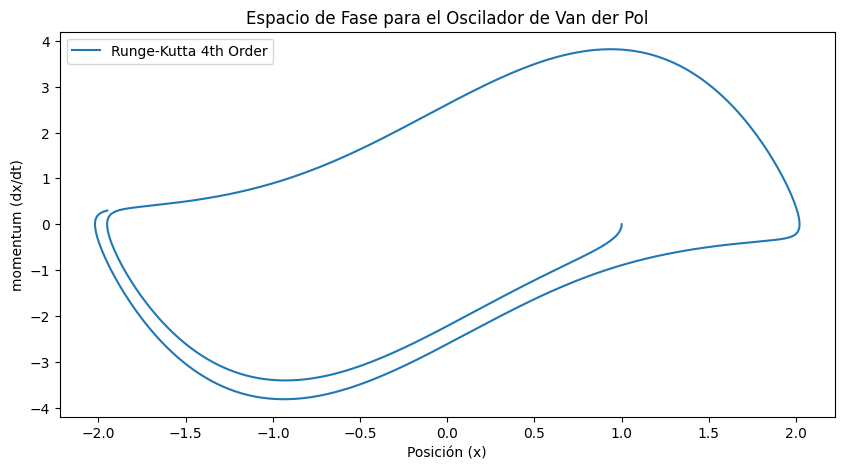

In [24]:
# Definir la ecuación de Van der Pol
def van_der_pol(x, mu):
    dxdt = x[1]
    dvdt = mu * (1 - x[0]**2) * x[1] - x[0]
    return np.array([dxdt, dvdt])

# Implementar el método de Runge-Kutta de cuarto orden
def runge_kutta_4th_order(func, initial_condition, mu, dt, num_steps):
    results = np.zeros((num_steps, len(initial_condition)))
    x = np.array(initial_condition)
    
    for i in range(num_steps):
        results[i] = x
        k1 = dt * func(x, mu)
        k2 = dt * func(x + 0.5 * k1, mu)
        k3 = dt * func(x + 0.5 * k2, mu)
        k4 = dt * func(x + k3, mu)
        
        x = x + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    
    return results

# Parámetros
mu = 2.0
dt = 0.01
num_steps = 1000

# Condiciones iniciales
initial_condition = [1.0, 0.0]

# Resolver la ecuación de Van der Pol con Runge-Kutta de cuarto orden
solution = runge_kutta_4th_order(van_der_pol, initial_condition, mu, dt, num_steps)

# Visualizar la solución en el espacio de fase
plt.figure(figsize=(10, 5))
plt.plot(solution[:, 0], solution[:, 1], label='Runge-Kutta 4th Order')
plt.title('Espacio de Fase para el Oscilador de Van der Pol')
plt.xlabel('Posición (x)')
plt.ylabel('momentum (dx/dt)')
plt.legend()
plt.show()

In [48]:
def custom_loss(y_true, y_pred):
    # Pérdida estándar (MSE)
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
    # Condiciones iniciales
    initial_condition_loss = tf.reduce_sum(tf.square(y_true[0, :] - y_pred[0, :]))
    
    # Peso para equilibrar ambas pérdidas
    alpha = 0.2
    
    # Pérdida total
    total_loss = loss + alpha * initial_condition_loss
    
    return total_loss

In [49]:
# Datos de entrada y salida generados con el método numérico
input_data = solution[:-1, 0].reshape(-1, 1)  # Usamos la posición como entrada
output_data = solution[:-1, 1].reshape(-1, 1)  # Usamos la velocidad como salida

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(1)  # Salida es la predicción de la velocidad
])


In [50]:
optimizador = tf.keras.optimizers.Adam()

In [53]:
# Compilar el modelo
model.compile(optimizer=optimizador, loss=custom_loss)

# Entrenar el modelo
model.fit(X_train, y_train, epochs=2000, validation_data=(X_test, y_test), verbose=2)

# Evaluar el rendimiento del modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss en el conjunto de prueba: {loss}')

# Hacer predicciones con el modelo
predictions = model.predict(input_data)

Epoch 1/2000
25/25 - 1s - loss: 2.5255 - val_loss: 2.4874 - 720ms/epoch - 29ms/step
Epoch 2/2000
25/25 - 0s - loss: 2.4773 - val_loss: 2.4852 - 63ms/epoch - 3ms/step
Epoch 3/2000
25/25 - 0s - loss: 2.5412 - val_loss: 2.4822 - 59ms/epoch - 2ms/step
Epoch 4/2000
25/25 - 0s - loss: 2.4181 - val_loss: 2.4826 - 58ms/epoch - 2ms/step
Epoch 5/2000
25/25 - 0s - loss: 2.7480 - val_loss: 2.4900 - 79ms/epoch - 3ms/step
Epoch 6/2000
25/25 - 0s - loss: 2.2991 - val_loss: 2.4891 - 71ms/epoch - 3ms/step
Epoch 7/2000
25/25 - 0s - loss: 2.2999 - val_loss: 2.4942 - 72ms/epoch - 3ms/step
Epoch 8/2000
25/25 - 0s - loss: 2.4201 - val_loss: 2.4839 - 77ms/epoch - 3ms/step
Epoch 9/2000
25/25 - 0s - loss: 2.3943 - val_loss: 2.4990 - 71ms/epoch - 3ms/step
Epoch 10/2000
25/25 - 0s - loss: 2.5203 - val_loss: 2.5105 - 72ms/epoch - 3ms/step
Epoch 11/2000
25/25 - 0s - loss: 2.2198 - val_loss: 2.4941 - 71ms/epoch - 3ms/step
Epoch 12/2000
25/25 - 0s - loss: 2.4879 - val_loss: 2.4859 - 60ms/epoch - 2ms/step
Epoch 13/20

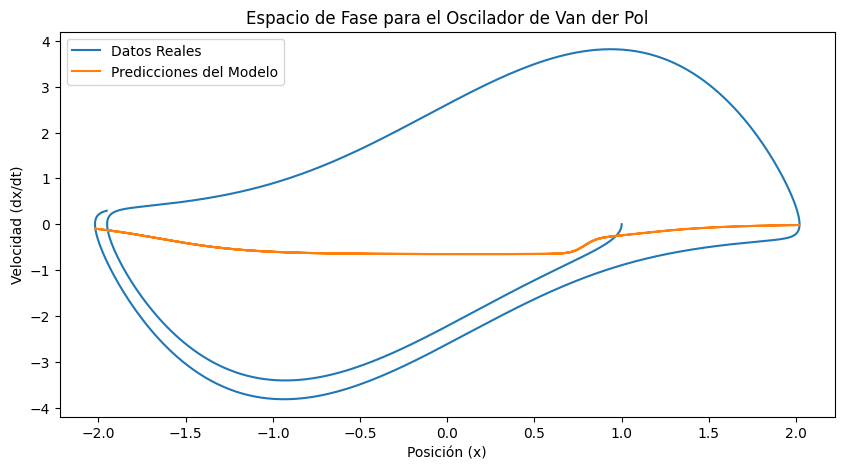

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(input_data, output_data, label='Datos Reales')
plt.plot(input_data, predictions, label='Predicciones del Modelo')
plt.title('Espacio de Fase para el Oscilador de Van der Pol')
plt.xlabel('Posición (x)')
plt.ylabel('Velocidad (dx/dt)')
plt.legend()
plt.show()